Checking the q files of rfmix

In [1]:
%run ../scripts/notebook_settings_lean.py
from glob import glob

/faststorage/project/baboondiversity/people/eriks/second_analysis_baboons/scripts/notebook_settings_lean.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', 'png')


In [2]:
rfmix_path = "/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_females_gen50/"

In [4]:
q_df = pd.read_csv(rfmix_path + "chr19.rfmix.Q", sep = "\t", header=1)

In [5]:
q_df = q_df.sort_values(["Kindae, Zambia"])

In [6]:
q_df

,#sample,"Hamadryas, Ethiopia","Kindae, Zambia","Papio, Senegal","Ursinus, Zambia"
87,PD_0700,1.0,0.00000,0.0,0.00000
80,PD_0392,0.0,0.00000,1.0,0.00000
81,PD_0393,0.0,0.00000,1.0,0.00000
82,PD_0394,0.0,0.00000,1.0,0.00000
77,Sci_97074,1.0,0.00000,0.0,0.00000
...,...,...,...,...,...
97,PD_0792,0.0,0.99428,0.0,0.00572
75,Sci_34449,0.0,0.99495,0.0,0.00505
94,PD_0789,0.0,0.99607,0.0,0.00393
93,PD_0788,0.0,0.99742,0.0,0.00258


In [7]:
q_df["#sample"]

87      PD_0700
80      PD_0392
81      PD_0393
82      PD_0394
77    Sci_97074
        ...    
97      PD_0792
75    Sci_34449
94      PD_0789
93      PD_0788
76    Sci_34474
Name: #sample, Length: 98, dtype: object

In [8]:
q_df["#sample"]

87      PD_0700
80      PD_0392
81      PD_0393
82      PD_0394
77    Sci_97074
        ...    
97      PD_0792
75    Sci_34449
94      PD_0789
93      PD_0788
76    Sci_34474
Name: #sample, Length: 98, dtype: object

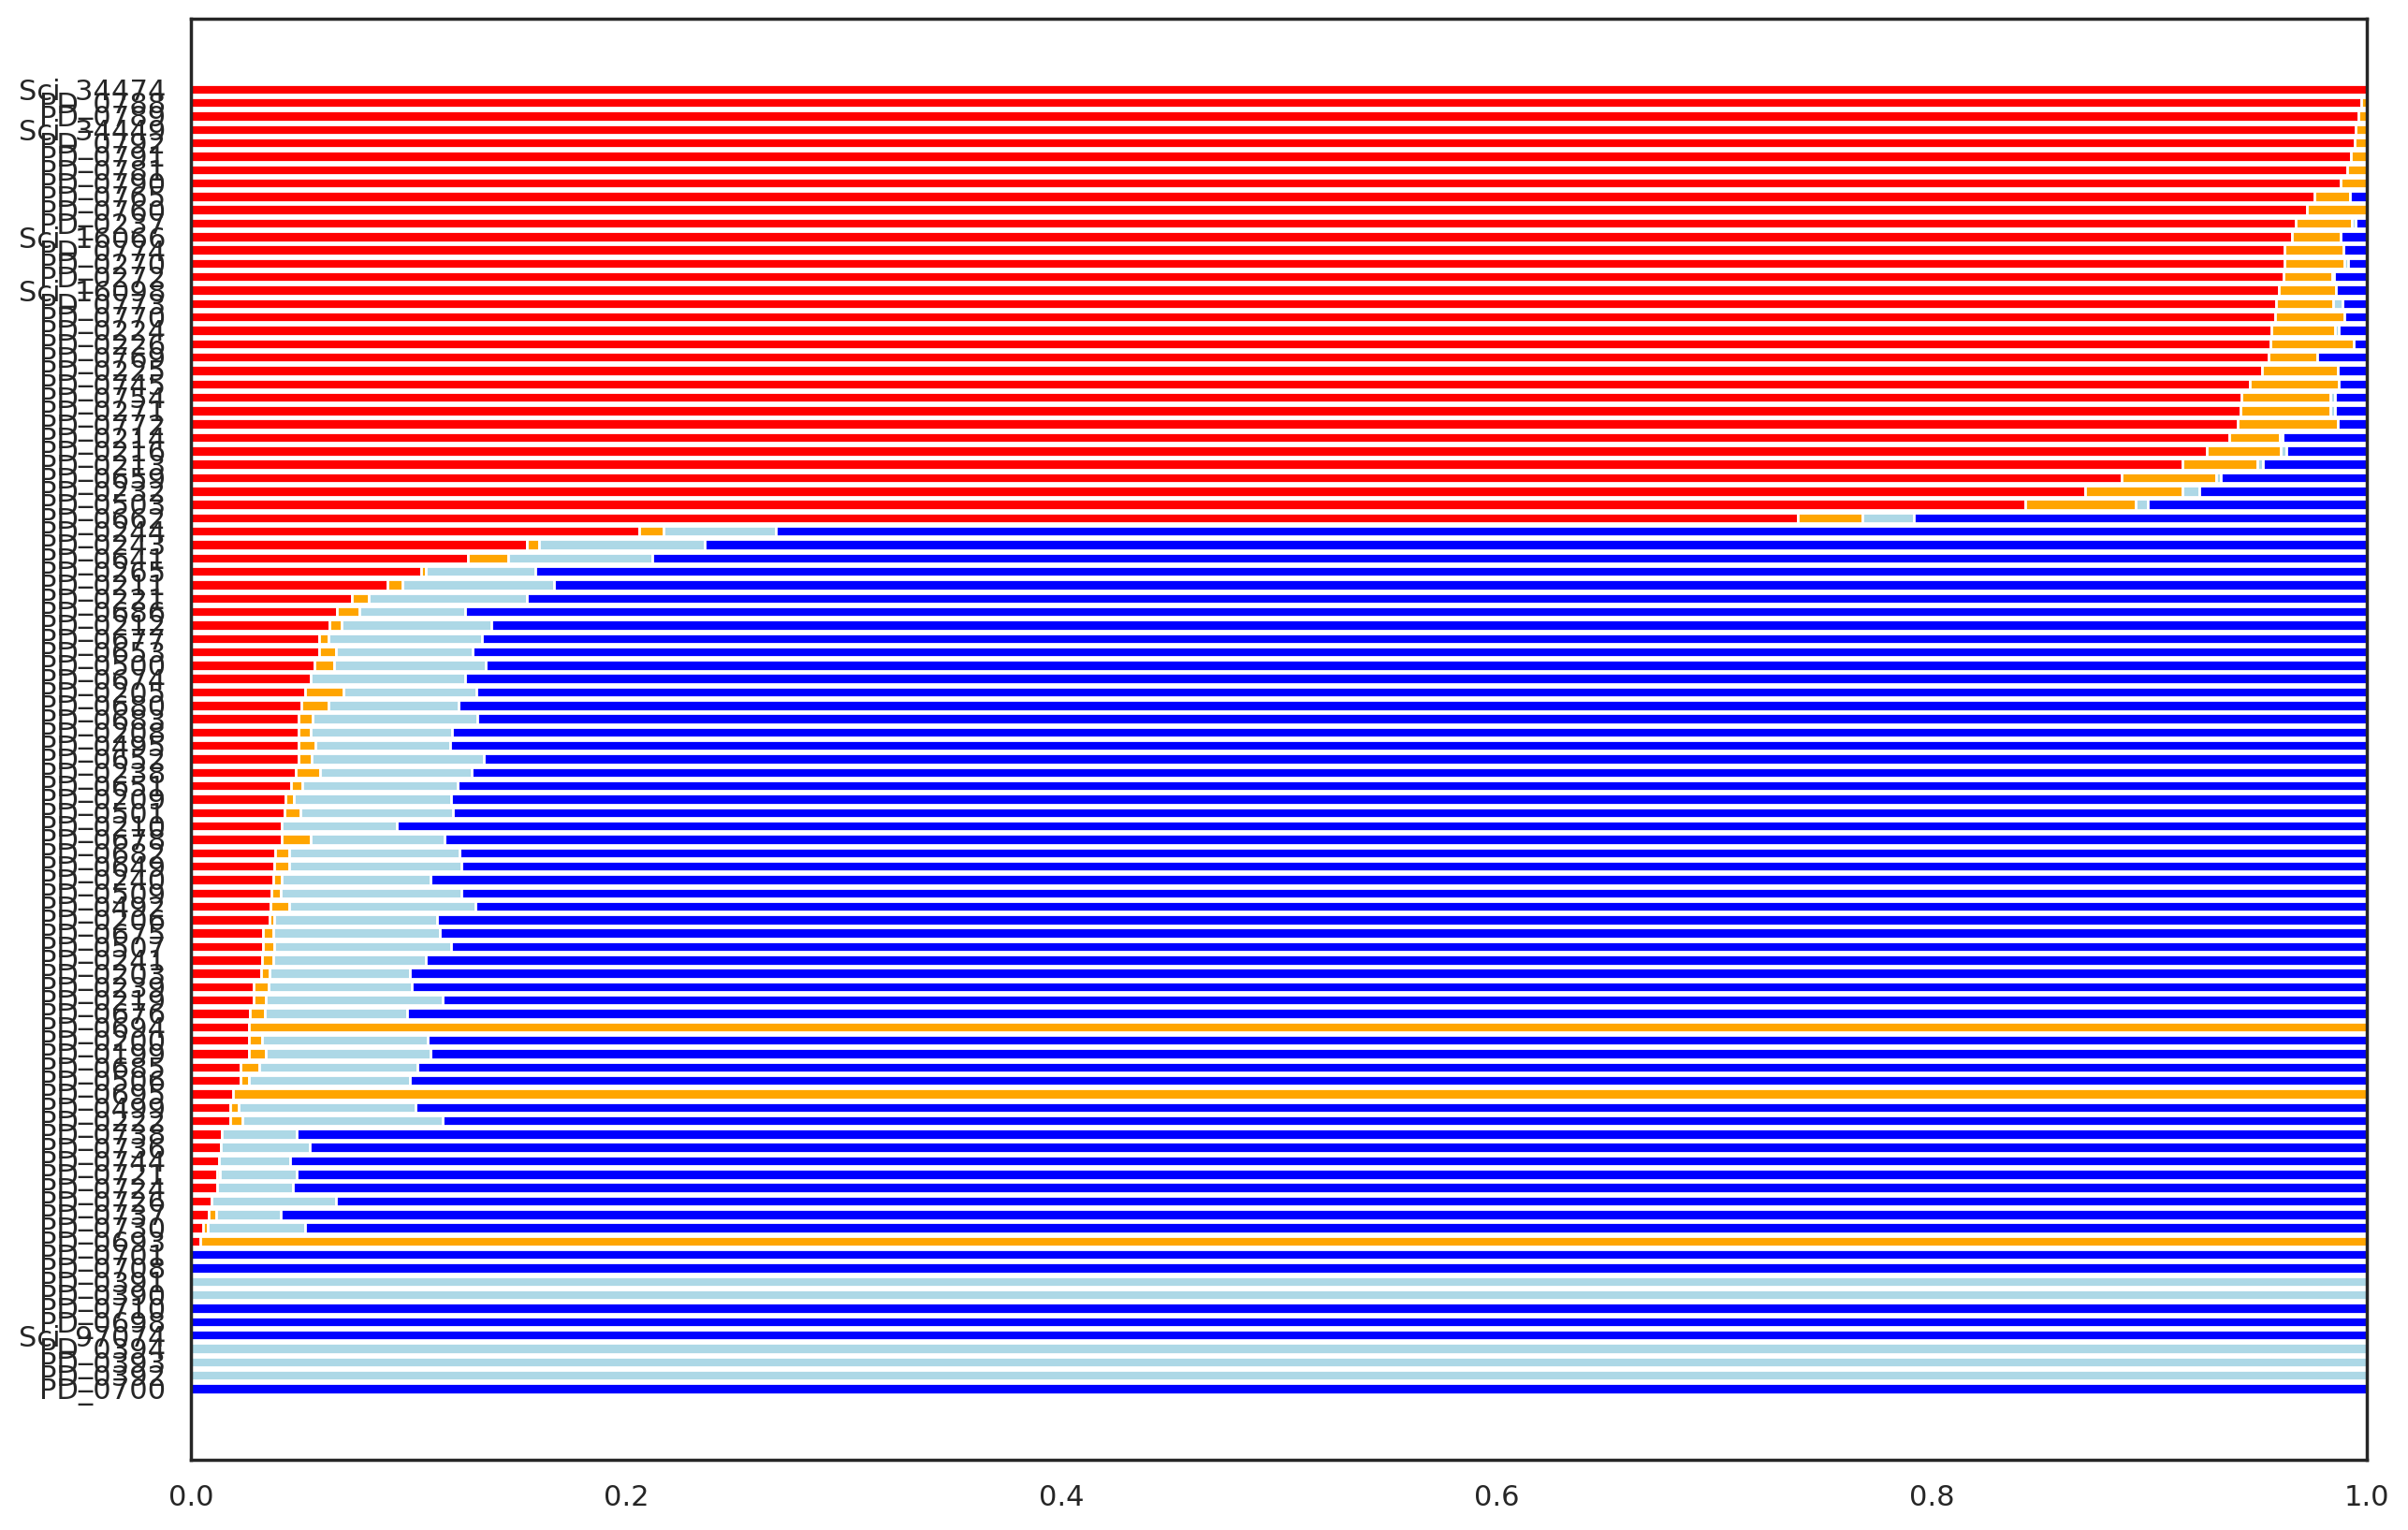

In [9]:
plt.figure(figsize=(15,10))
data_lst = [q_df["Kindae, Zambia"], q_df["Ursinus, Zambia"], q_df["Papio, Senegal"],
            q_df["Hamadryas, Ethiopia"]]
color_lst = ["red", "orange", "lightblue", "blue"]
left = 0
for data, color in zip(data_lst, color_lst):
    plt.barh(q_df["#sample"], data, color=color, left=left)
    left += data

In [9]:
df_l = []
chromosomes = [f'chr{x}' for x in range(1, 21)]
for chrom in chromosomes:
    q_df = pd.read_csv(rfmix_path + chrom + ".rfmix.Q", sep = "\t", header=1)
    df_l.append(q_df)
q_df_autosomes = pd.concat(df_l)

In [10]:
q_df_autosomes_mean = q_df_autosomes.groupby(["#sample"]).mean().reset_index()

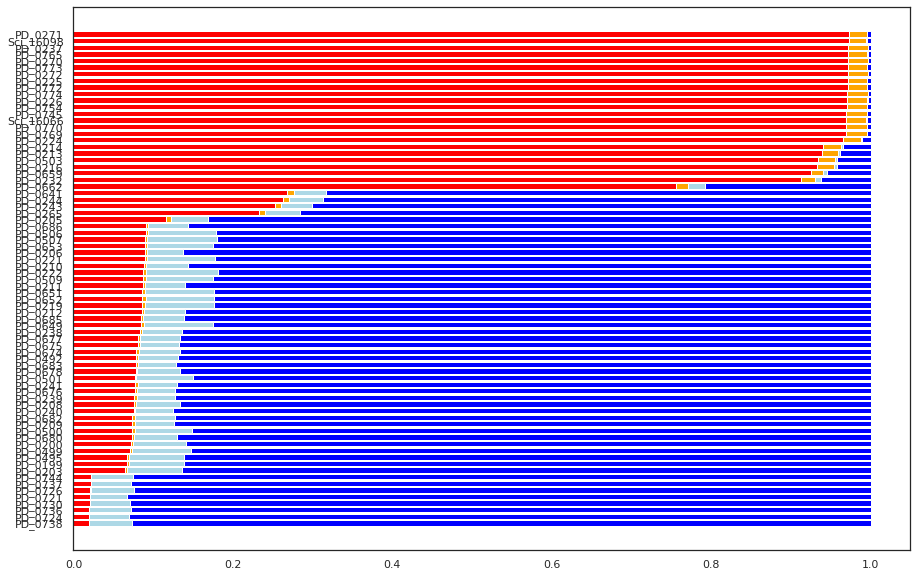

In [11]:
i_df = q_df_autosomes_mean
i_df = i_df.sort_values(["Kindae, Zambia"])
plt.figure(figsize=(15,10))
data_lst = [i_df["Kindae, Zambia"], i_df["Ursinus, Zambia"], i_df["Papio, Senegal"],
            i_df["Hamadryas, Ethiopia"]]
color_lst = ["red", "orange", "lightblue", "blue"]
left = 0
for data, color in zip(data_lst, color_lst):
    plt.barh(i_df["#sample"], data, color=color, left=left)
    left += data

In [12]:
df_l = []
chromosomes = ["chrX"]
for chrom in chromosomes:
    q_df = pd.read_csv(rfmix_path + chrom + ".rfmix.Q", sep = "\t", header=1)
    df_l.append(q_df)
q_df_x = pd.concat(df_l)

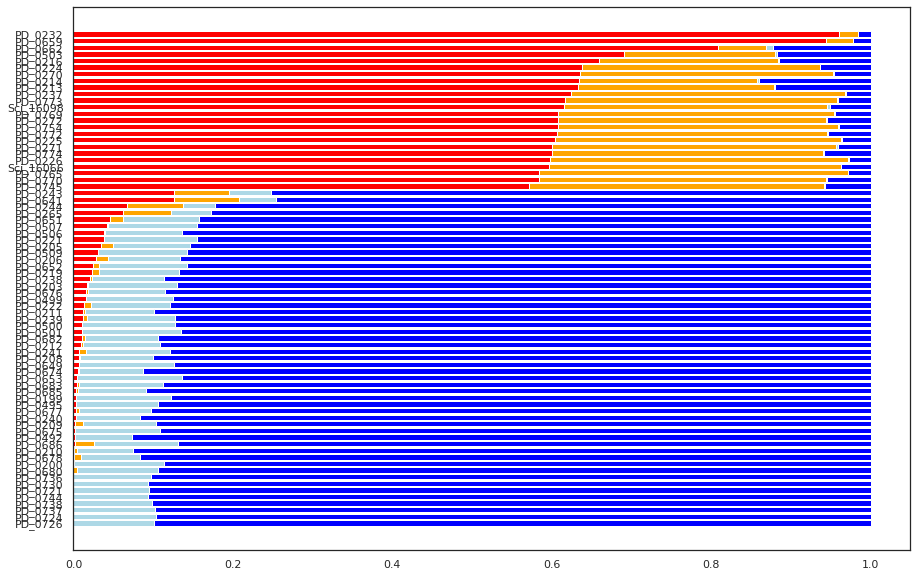

In [13]:
q_df_x_mean = q_df_x.groupby(["#sample"]).mean().reset_index()
i_df = q_df_x_mean
i_df = i_df.sort_values(["Kindae, Zambia"])
plt.figure(figsize=(15,10))
data_lst = [i_df["Kindae, Zambia"], i_df["Ursinus, Zambia"], i_df["Papio, Senegal"],
            i_df["Hamadryas, Ethiopia"]]
color_lst = ["red", "orange", "lightblue", "blue"]
left = 0
for data, color in zip(data_lst, color_lst):
    plt.barh(i_df["#sample"], data, color=color, left=left)
    left += data

In [58]:
ID_mapping = dict(zip(meta_data_samples["PGDP_ID"], meta_data_samples["Origin"]))
q_df_x_mean["north"] = q_df_x_mean["Papio, Senegal"] + q_df_x_mean["Hamadryas, Ethiopia"]
q_df_x_mean["Origin"] = q_df_x_mean["#sample"].map(ID_mapping)
sorted_df = q_df_x_mean.sort_values("north")
list(sorted_df.Origin)

['Mahale, Tanzania',
 'Mahale, Tanzania',
 'Mikumi, Tanzania',
 'Udzungwa, Tanzania',
 'Selous, Tanzania',
 'Udzungwa, Tanzania',
 nan,
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 nan,
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Udzungwa, Tanzania',
 'Ruaha, Tanzania',
 'Ruaha, Tanzania',
 'Ruaha, Tanzania',
 'Issa Valley, Tanzania',
 'Ruaha, Tanzania',
 'Tarangire, Tanzania',
 'Tarangire, Tanzania',
 'Tarangire, Tanzania',
 'Tarangire, Tanzania',
 'Gombe, Tanzania',
 'Arusha, Tanzania',
 'Gombe, Tanzania',
 'Arusha, Tanzania',
 'Gombe, Tanzania',
 'Gombe, Tanzania',
 'Gombe, Tanzania',
 'Gombe, Tanzania',
 'Gombe, Tanzania',
 'Lake Manyara, Tanzania',
 'Lake Manyara, Tanzania',
 'Gombe, Tanzania',
 'Lake Manyara, Tanzania',
 'Serengeti, Tanzania',
 'Lake Manyara, Tanzania',
 'Lake Manyara, Tanzania',
 'Serengeti, Tanzania',
 'Ngorongoro, Tanzania',
 'Lake Manyar

Doing it with all

In [14]:
rfmix_path = "/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all/"

In [15]:
df_l = []
chromosomes = [f'chr{x}' for x in range(4, 21)]
for chrom in chromosomes:
    q_df = pd.read_csv(rfmix_path + chrom + ".rfmix.Q", sep = "\t", header=1)
    df_l.append(q_df)
q_df_autosomes = pd.concat(df_l)
q_df_autosomes_mean = q_df_autosomes.groupby(["#sample"]).mean().reset_index()


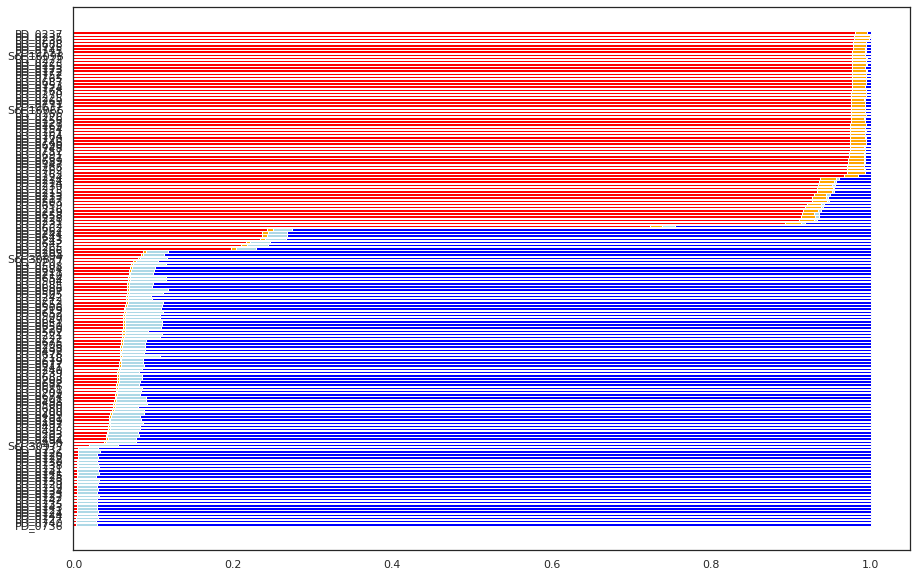

In [16]:
i_df = q_df_autosomes_mean
i_df = i_df.sort_values(["Kindae, Zambia"])
plt.figure(figsize=(15,10))
data_lst = [i_df["Kindae, Zambia"], i_df["Ursinus, Zambia"], i_df["Papio, Senegal"],
            i_df["Hamadryas, Ethiopia"]]
color_lst = ["red", "orange", "lightblue", "blue"]
left = 0
for data, color in zip(data_lst, color_lst):
    plt.barh(i_df["#sample"], data, color=color, left=left)
    left += data

In [17]:
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering.txt", sep =" ")

In [18]:
IDs = meta_data_samples.loc[meta_data_samples.C_origin.isin([# "Cynocephalus, Central Tanzania",
                                                       "Anubis, Tanzania", "Cynocephalus, Western Tanzania"])].PGDP_ID

In [19]:
meta_data_samples.loc[meta_data_samples.PGDP_ID == "PD_0693"]

,PGDP_ID,Provider_ID,Provider,Genus,Species,Origin,Sex,address,longitude,latitude,callset_index,C_origin
125,PD_0693,35225_BZ12031,Rogers/Jolly/Phillips-Conroy,Papio,ursinus (grayfoot),"Dendro Park, Zambia",F,"Dendro Balla Balla Safaris, Namwala, Zambia",26.06255,-16.145438,125,"Ursinus, Zambia"


In [20]:
subset_df = q_df_autosomes_mean.loc[q_df_autosomes_mean["#sample"].isin(IDs)]

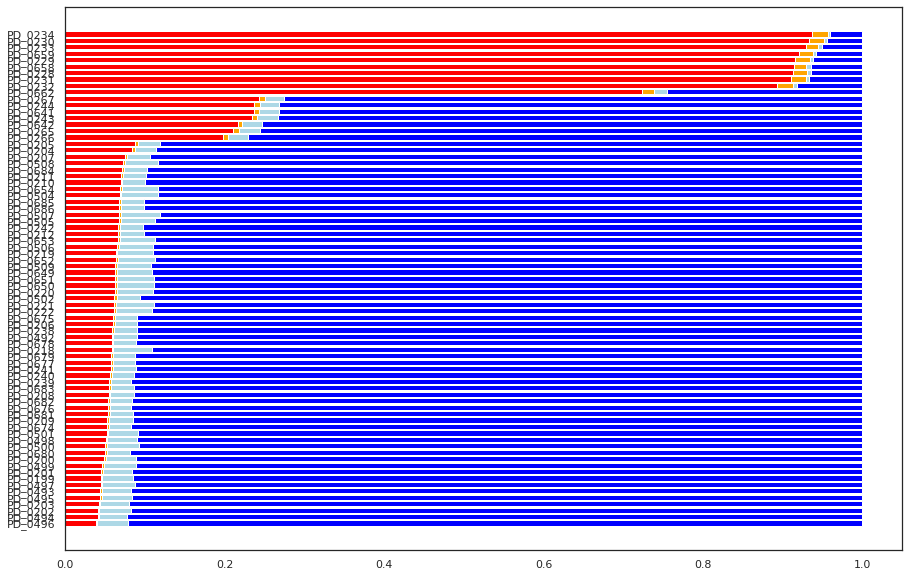

In [21]:
i_df = subset_df
i_df = i_df.sort_values(["Kindae, Zambia"])
plt.figure(figsize=(15,10))
data_lst = [i_df["Kindae, Zambia"], i_df["Ursinus, Zambia"], i_df["Papio, Senegal"],
            i_df["Hamadryas, Ethiopia"]]
color_lst = ["red", "orange", "lightblue", "blue"]
left = 0
for data, color in zip(data_lst, color_lst):
    plt.barh(i_df["#sample"], data, color=color, left=left)
    left += data

In [22]:
IDs = meta_data_samples.loc[meta_data_samples.C_origin.isin(["Cynocephalus, Central Tanzania"])].PGDP_ID

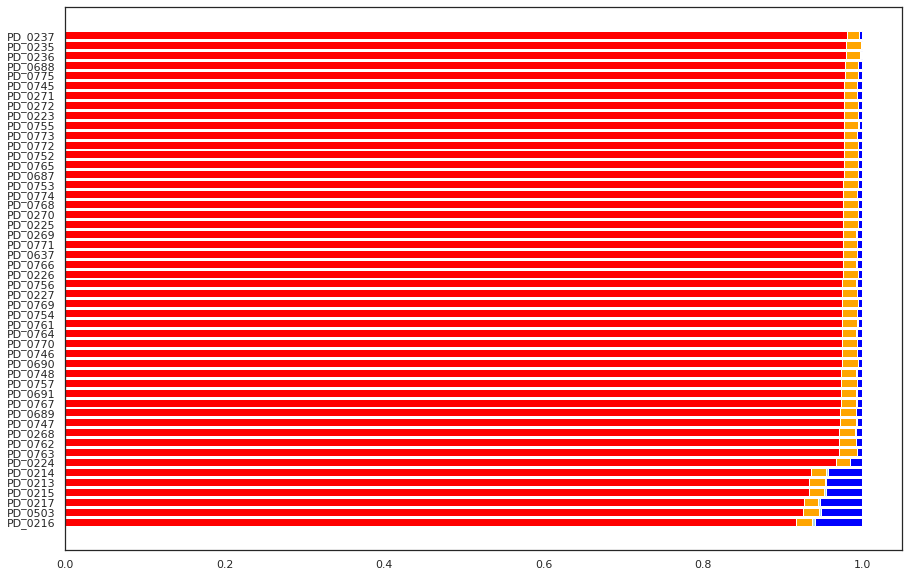

In [23]:
subset_df = q_df_autosomes_mean.loc[q_df_autosomes_mean["#sample"].isin(IDs)]
i_df = subset_df
i_df = i_df.sort_values(["Kindae, Zambia"])
plt.figure(figsize=(15,10))
data_lst = [i_df["Kindae, Zambia"], i_df["Ursinus, Zambia"], i_df["Papio, Senegal"],
            i_df["Hamadryas, Ethiopia"]]
color_lst = ["red", "orange", "lightblue", "blue"]
left = 0
for data, color in zip(data_lst, color_lst):
    plt.barh(i_df["#sample"], data, color=color, left=left)
    left += data

Check of the EM gradient.

In [24]:
rfmix_path = "/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/"

In [25]:
paths = glob(rfmix_path + "chr*.rfmix.Q")

In [26]:
paths

['/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/chr16.rfmix.Q',
 '/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/chr12.rfmix.Q',
 '/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/chr7.rfmix.Q',
 '/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/chr3.rfmix.Q',
 '/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/chr20.rfmix.Q',
 '/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/chr17.rfmix.Q',
 '/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/chr13.rfmix.Q',
 '/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/chr6.rfmix.Q',
 '/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/chr2.rfmix.Q',
 '/home/eriks/

In [27]:
df_l = []
chromosomes = [f'chr{x}' for x in range(4, 21)]
for path in paths:
    print(path)
    q_df = pd.read_csv(path, sep = "\t", header=1)
    df_l.append(q_df)
q_df_autosomes = pd.concat(df_l)
q_df_autosomes_mean = q_df_autosomes.groupby(["#sample"]).mean().reset_index()


/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/chr16.rfmix.Q
/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/chr12.rfmix.Q
/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/chr7.rfmix.Q
/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/chr3.rfmix.Q
/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/chr20.rfmix.Q
/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/chr17.rfmix.Q
/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/chr13.rfmix.Q
/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/chr6.rfmix.Q
/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_all_reanalyze5/chr2.rfmix.Q
/home/eriks/baboondiversity/people/eriks/second_an

In [28]:
q_df.loc[q_df["#sample"] == "PD_0393"]

,#sample,"Hamadryas, Ethiopia","Kindae, Zambia","Papio, Senegal","Ursinus, Zambia"
163,PD_0393,0.0,0.0,1.0,0.0


In [29]:
q_df_autosomes_mean.sort_values(["Papio, Senegal"])

,#sample,"Hamadryas, Ethiopia","Kindae, Zambia","Papio, Senegal","Ursinus, Zambia"
224,Sci_97124,1.0,0.000000,0.0,0.000000
182,PD_0760,0.0,0.976407,0.0,0.023593
181,PD_0759,0.0,0.988082,0.0,0.011918
180,PD_0758,0.0,0.984460,0.0,0.015540
173,PD_0751,0.0,0.981620,0.0,0.018381
...,...,...,...,...,...
64,PD_0400,0.0,0.000000,1.0,0.000000
63,PD_0399,0.0,0.000000,1.0,0.000000
62,PD_0398,0.0,0.000000,1.0,0.000000
60,PD_0396,0.0,0.000000,1.0,0.000000


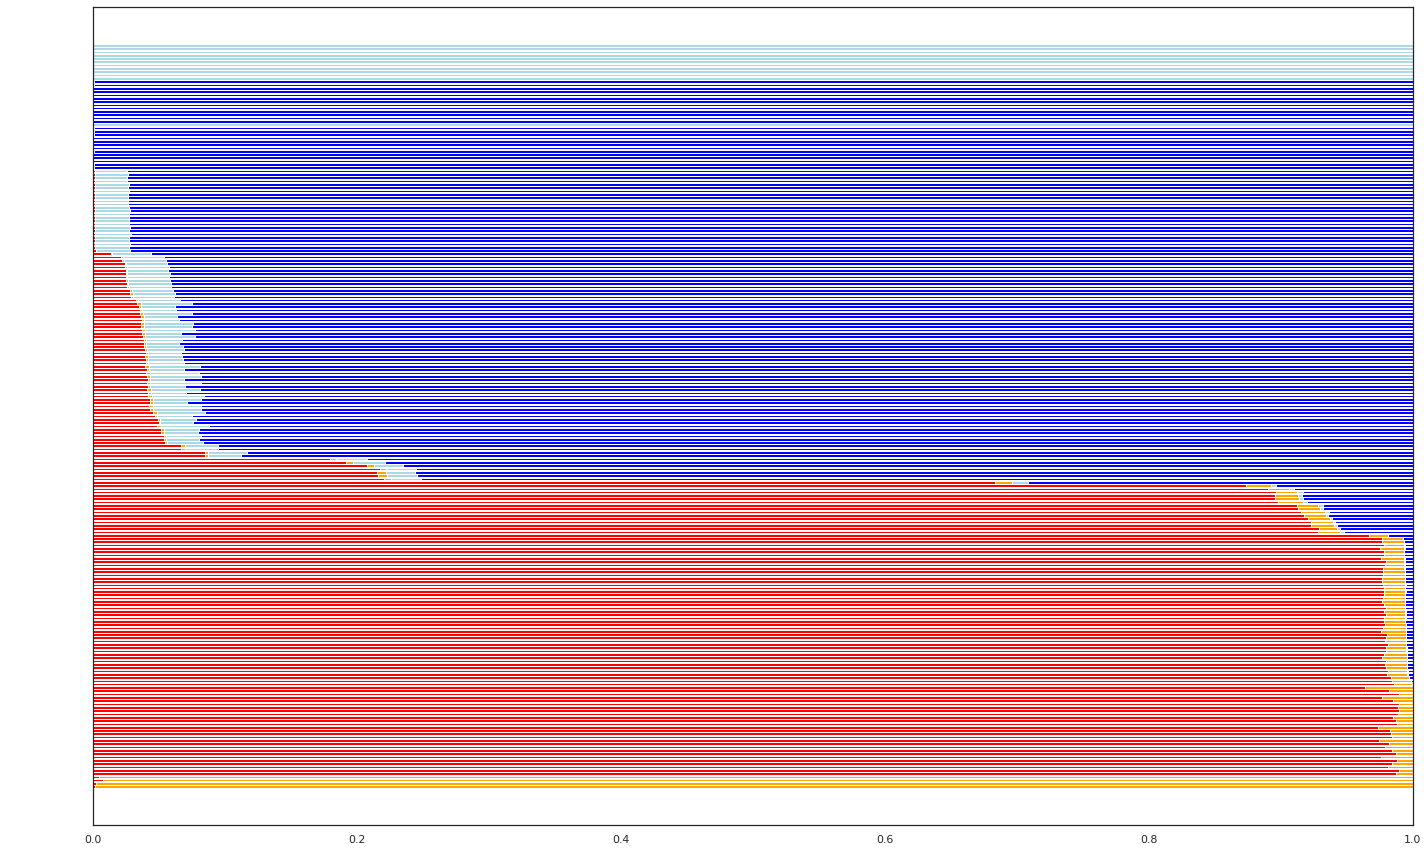

In [30]:
i_df = q_df_autosomes_mean
i_df["north"] = i_df["Papio, Senegal"] + i_df["Hamadryas, Ethiopia"]
i_df = i_df.sort_values(["north", "Papio, Senegal"])
plt.figure(figsize=(20,12))
data_lst = [i_df["Kindae, Zambia"], i_df["Ursinus, Zambia"], i_df["Papio, Senegal"],
            i_df["Hamadryas, Ethiopia"]]
color_lst = ["red", "orange", "lightblue", "blue"]
left = 0
for data, color in zip(data_lst, color_lst):
    plt.barh(i_df["#sample"], data, color=color, left=left)
    left += data
matplotlib.pyplot.yticks(color='w')
plt.tight_layout()
plt.savefig("../steps/paint_plots/rfmix_all.png", dpi=100, format="png")

In [31]:
IDs = meta_data_samples.loc[meta_data_samples.C_origin.isin(["Cynocephalus, Central Tanzania"])].PGDP_ID
q_df_autosomes_mean.loc[q_df_autosomes_mean["#sample"].isin(IDs)].sort_values("north")

,#sample,"Hamadryas, Ethiopia","Kindae, Zambia","Papio, Senegal","Ursinus, Zambia",north
36,PD_0235,0.000676,0.985660,0.000000,0.013664,0.000676
37,PD_0236,0.001409,0.984204,0.000142,0.014244,0.001552
38,PD_0237,0.002381,0.983586,0.000102,0.013931,0.002484
174,PD_0752,0.003857,0.980902,0.000038,0.015204,0.003895
53,PD_0272,0.003809,0.981499,0.000447,0.014244,0.004256
168,PD_0746,0.004194,0.979809,0.000120,0.015879,0.004314
196,PD_0774,0.004381,0.979363,0.000058,0.016199,0.004439
177,PD_0755,0.004219,0.979745,0.000240,0.015796,0.004459
112,PD_0690,0.004266,0.976994,0.000204,0.018538,0.004470
190,PD_0768,0.004494,0.978449,0.000065,0.016995,0.004559


In [55]:
ID_mapping = dict(zip(meta_data_samples["PGDP_ID"], meta_data_samples["Origin"]))
q_df_autosomes_mean["Origin"] = q_df_autosomes_mean["#sample"].map(ID_mapping)
sorted_df = q_df_autosomes_mean.sort_values("north")
list(sorted_df.Origin) #.loc[sorted_df.north > 0.0001]

['Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Dendro Park, Zambia',
 'Dendro Park, Zambia',
 'Dendro Park, Zambia',
 'Dendro Park, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 nan,
 nan,
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Chunga, Zambia',
 'Selous, Tanzania',
 'Selous, Tanzania',
 'Selous, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania

In [51]:
sorted_df.loc[sorted_df.north < 0.9999]

,#sample,"Hamadryas, Ethiopia","Kindae, Zambia","Papio, Senegal","Ursinus, Zambia",north,Origin
207,PD_0785,0.000000,0.982692,0.000000,0.017308,0.000000,"Chunga, Zambia"
202,PD_0780,0.000000,0.978739,0.000000,0.021261,0.000000,"Chunga, Zambia"
203,PD_0781,0.000000,0.981874,0.000000,0.018125,0.000000,"Chunga, Zambia"
204,PD_0782,0.000000,0.974897,0.000000,0.025103,0.000000,"Chunga, Zambia"
117,PD_0695,0.000000,0.004555,0.000000,0.995445,0.000000,"Dendro Park, Zambia"
...,...,...,...,...,...,...,...
142,PD_0720,0.973085,0.001262,0.025620,0.000034,0.998705,"Gog Woreda, Gambella region, Ethiopia"
154,PD_0732,0.974265,0.001280,0.024457,0.000000,0.998722,"Gog Woreda, Gambella region, Ethiopia"
150,PD_0728,0.974509,0.001213,0.024247,0.000029,0.998757,"Gog Woreda, Gambella region, Ethiopia"
143,PD_0721,0.973808,0.001053,0.025070,0.000070,0.998877,"Gog Woreda, Gambella region, Ethiopia"


In [32]:
meta_data_samples.loc[meta_data_samples.PGDP_ID == "PD_0752"]

,PGDP_ID,Provider_ID,Provider,Genus,Species,Origin,Sex,address,longitude,latitude,callset_index,C_origin
184,PD_0752,16049_3114,Rogers,Papio,cynocephalus,"Mikumi, Tanzania",M,"Mikumi, Kilosa, Morogoro, Coastal Zone, Tanzania",36.977032,-7.404852,184,"Cynocephalus, Central Tanzania"


/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


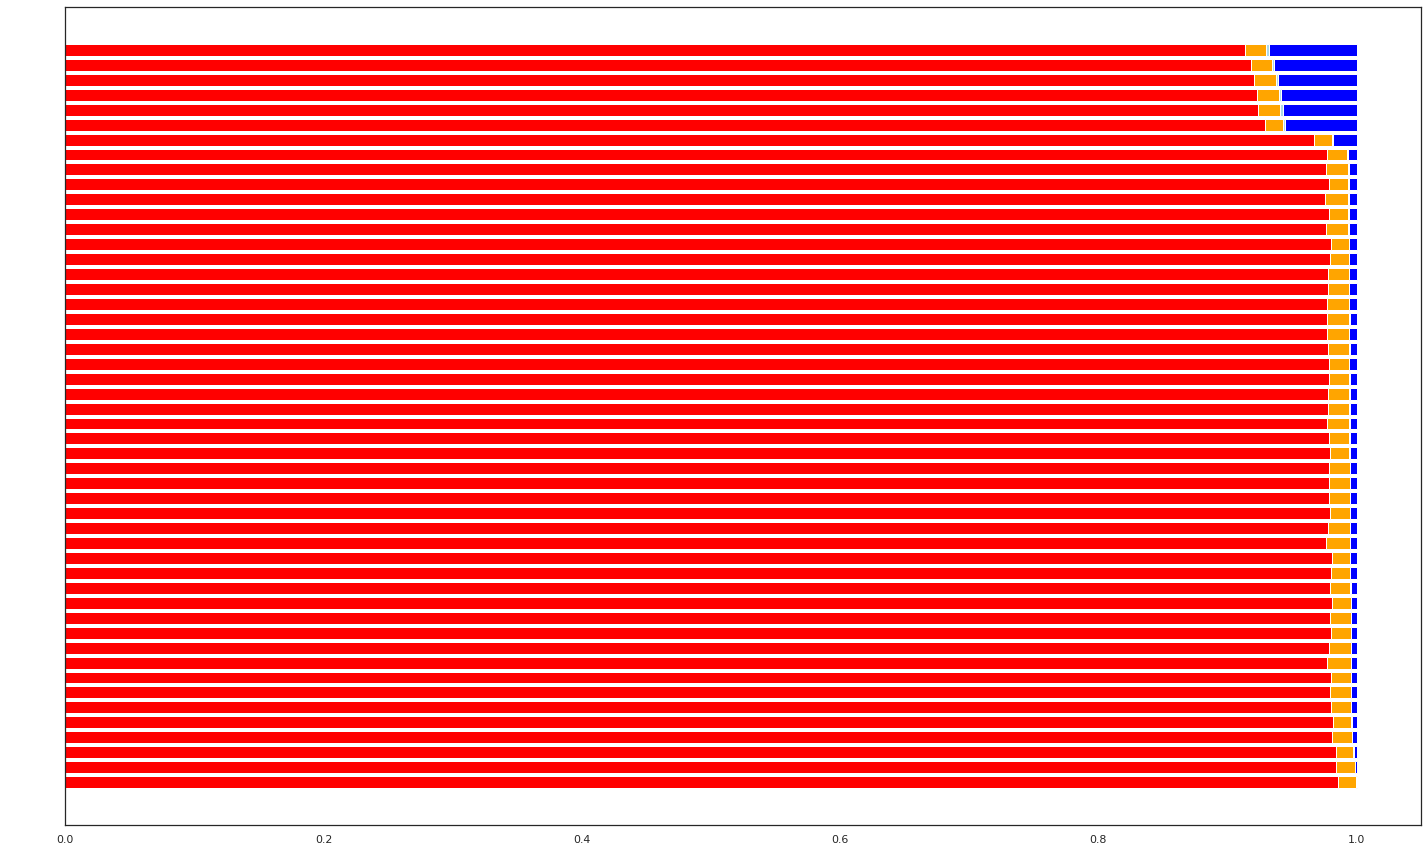

In [33]:
IDs = meta_data_samples.loc[meta_data_samples.C_origin.isin(["Cynocephalus, Central Tanzania"])].PGDP_ID
i_df = q_df_autosomes_mean.loc[q_df_autosomes_mean["#sample"].isin(IDs)]
i_df["north"] = i_df["Papio, Senegal"] + i_df["Hamadryas, Ethiopia"]
i_df = i_df.sort_values(["north", "Papio, Senegal"])
plt.figure(figsize=(20,12))
data_lst = [i_df["Kindae, Zambia"], i_df["Ursinus, Zambia"], i_df["Papio, Senegal"],
            i_df["Hamadryas, Ethiopia"]]
color_lst = ["red", "orange", "lightblue", "blue"]
left = 0
for data, color in zip(data_lst, color_lst):
    plt.barh(i_df["#sample"], data, color=color, left=left)
    left += data
matplotlib.pyplot.yticks(color='w')
plt.tight_layout()